# NCEP GDAS/FNL data visualization

In [2]:
import sys
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np
import netCDF4 as nc

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
import data_utils as du
from namelist import * 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Check missing files based on datetime

In [21]:
# number of files
filename_TMAX = sorted(glob(NCEP_TMAX_dir+'*.nc'))
filename_TMEAN = sorted(glob(NCEP_TMEAN_dir+'*.nc'))

In [88]:
base = datetime(2019, 1, 1, 0)
date_list = [base + timedelta(hours=x) for x in range(0, 365*24, 6)]

base = '/glade/scratch/ksha/BACKUP/NCEP_FNL/TMEAN/gdas1.fnl0p25.{}.f00.grib2.sha*.nc'
for i, date in enumerate(date_list):
    out = glob(base.format(datetime.strftime(date, '%Y%m%d%H')))
    if len(out) == 0:
        print(datetime.strftime(date, '%Y%m%d%H'))

**No missing**

# Single file test

In [24]:
# TMAX/TMIN/PCT
with nc.Dataset(filename_TMAX[0], 'r') as nc_obj:
    print(nc_obj.variables.keys())

dict_keys(['APCP_P8_L1_GLL0_acc', 'TMAX_P8_L103_GLL0_max', 'TMIN_P8_L103_GLL0_min', 'initial_time0', 'initial_time0_encoded', 'initial_time0_hours', 'lat_0', 'lon_0'])


In [25]:
# TMEAN
with nc.Dataset(filename_TMEAN[0], 'r') as nc_obj:
    print(nc_obj.variables.keys())

dict_keys(['TMP_P0_L103_GLL0', 'initial_time0', 'initial_time0_encoded', 'initial_time0_hours', 'lat_0', 'lon_0'])


# US domain test

In [8]:
var = 'TMAX'
with h5py.File(NCEP_dir + 'NCEP_{}_features_2016_2020.hdf'.format(var), 'r') as hdf_io:
    lon_4km = hdf_io['lon_4km'][...]
    lat_4km = hdf_io['lat_4km'][...]
    REGRID = hdf_io['{}_REGRID'.format(var)][...]
    CLIM_4km = hdf_io['{}_CLIM_4km'.format(var)][...] 
    CLIM_REGRID = hdf_io['{}_CLIM_REGRID'.format(var)][...]
    

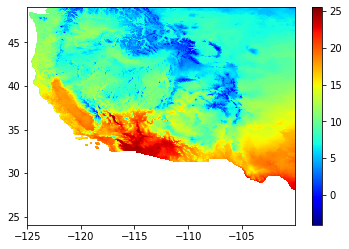

In [10]:
plt.pcolormesh(lon_4km, lat_4km, CLIM_4km[0, ...], cmap=plt.cm.jet)
plt.colorbar()

# BC domain test

In [5]:
var = 'TMAX'
with h5py.File(NCEP_dir+'NCEP_{}_features_BC_2016_2020.hdf'.format(var), 'r') as hdf_io:
    lon_4km = hdf_io['lon_4km'][...]
    lat_4km = hdf_io['lat_4km'][...]
    CLIM_4km = hdf_io['{}_CLIM_4km'.format(var)][...]

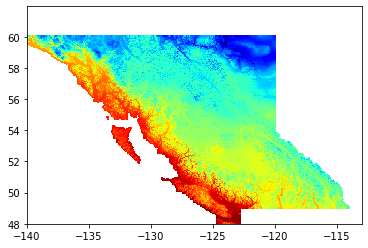

In [7]:
plt.pcolormesh(lon_4km, lat_4km, CLIM_4km[0, ...], cmap=plt.cm.jet)